<a href="https://colab.research.google.com/github/JayMalde/demo-repo/blob/master/Exercise_3_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Problem And Proving Moore's Law That With Every 2-2.5 Years No of Transistors Get Doubled**

## **Loading File in Google Colab**

In [2]:
from google.colab import files

In [3]:
load_files = files.upload()

Saving moore.csv to moore.csv


In [4]:
!ls

moore.csv  sample_data


## **Loading All Libraries**

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## **Checking For Data is Linear Or Not**

In [30]:
data = pd.read_csv("moore.csv")
data.head(30)

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500
5,1974,8000
6,1975,3510
7,1976,5000
8,1976,8500
9,1976,6500


In [31]:
#Step 1 :- Load The Data
data = pd.read_csv("moore.csv").values
X = data[:,0:1]
y = data[:,1]

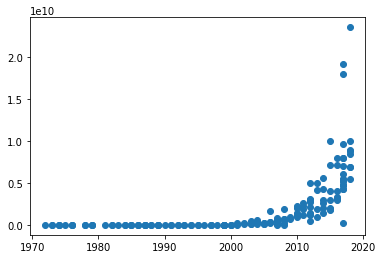

In [32]:
# y = mx +c
plt.scatter(X,y)

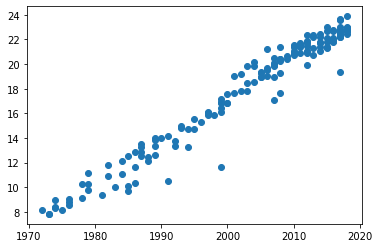

In [33]:
Y = np.log(y)
plt.scatter(X,Y)

## **Normalizing The Data Using Mean**

In [34]:
X = X - X.mean()

##Creating Model With **Gradient Descent Optimizer** with **0.001 Learning Rate** and **0.9 Momentum** and for starting **50 epochs** learning will be **fast(0.001)** and then gradually it will become **slow(0.0001)**

In [47]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 318.8961
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 297.3201
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 492.4099
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 201.5775
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 166.6851
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 141.1796
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 88.4639
Epoch 8/200
6/6 [==============================] - 0s 979us/step - loss: 70.6741
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 68.5595
Epoch 10/200
6/6 [==============================] - 0s 999us/step - loss: 64.6331
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 60.0091
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 44.7183
Epoch 13/200
6/6 [=====================

##  **Testing The Accuracy Of First Neuron** *Hence Proved That With Every 2.04 years No.of Transistors get Doubled*

In [48]:
a = model.layers[0].get_weights()[0][0]

In [49]:
print("Time:", np.log(2)/a)

Time: [2.03218]


## **Plotting The Best Fit Line In Regression**

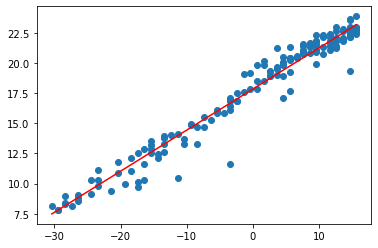

In [50]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat, color='red')